
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science - Intro*


---




Estimando o preço de venda de um carro

# Aula 05_2 - Desenvolvimento do Modelo Polinomial

Tempo estimado: **60** minutos

## Objetivos

Após completar este AULA, você será capaz de:

* Criar um modelo poinomial para a previsão
* Fazer a previsão dos seus dados


In [1]:
# import libraries
import pandas as pd  # Biblioteca para os DataFrames 
import numpy as np   # Biblioteca Numérica
import math 
import matplotlib.pyplot as plt
import seaborn as sns # import the visualization package: seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Ler o arquivo online pela URL fornecida acima, e atribua-o à variável "df".
my_file = "Auto_pronto.csv" #Cópia de segurança ;)

# Atribuir o arquivo a uma váriável DataFrame
df = pd.read_csv(my_file)

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   wheel-base         201 non-null    float64
 3   length             201 non-null    float64
 4   width              201 non-null    float64
 5   height             201 non-null    float64
 6   curb-weight        201 non-null    int64  
 7   engine-size        201 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  201 non-null    float64
 11  horsepower         201 non-null    float64
 12  peak-rpm           201 non-null    float64
 13  city-mpg           201 non-null    int64  
 14  highway-mpg        201 non-null    int64  
 15  price              201 non-null    float64
 16  fuel-type-diesel   201 non

In [3]:
# Função para plotar o polinômio

def PlotPolinomio(model, indVariable, depVariable, Name):
    
    min_iv = indVariable.min()
    max_iv = indVariable.max()
      
    x_new = np.linspace(min_iv, max_iv, 100)
    y_new = model(x_new)
    
    plt.figure(figsize=(15, 10))
    plt.plot(indVariable, depVariable, '.', x_new, y_new, 'r-')
    plt.title('Polynomial Fit')
    plt.xlabel(Name)
    plt.ylabel('Preços dos Carros')
    plt.text(x_new.max()*0.8,y_new.max()*0.8,model, size = 12)
    
    plt.show()
    plt.close()

# Modelo Polinomial Grau 2 - Uma variável independente

<h4>Como poderia " highway-mpg" nos ajudar a prever o preço do carro?</h4>

Para este exemplo, queremos ver como a highway-mpg pode nos ajudar a prever o preço do carro.

Usando a regressão polinomial simples, criaremos uma função polinomial com "highway-mpg" como a variável preditor e o " price" como a variável de resposta.


p(x) =
       2
45.35 x - 3773 x + 8.419e+04

R-quadrado:  0.6517936037026721


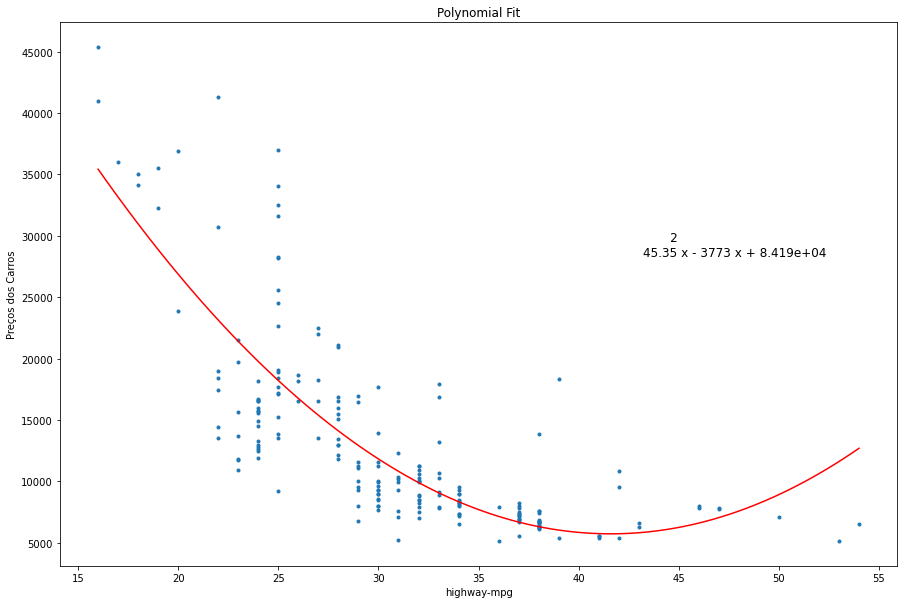

In [4]:
x = df['highway-mpg']
y = df['price']

degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)

print("p(x) =")
print(p)
r_squared = r2_score(y, p(x))
print('\nR-quadrado: ', r_squared)

PlotPolinomio(p, x, y, 'highway-mpg')

# Modelo Polinomial Grau 3 - Uma variável independente

p(x) =
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05

R-quadrado:  0.674194666390652


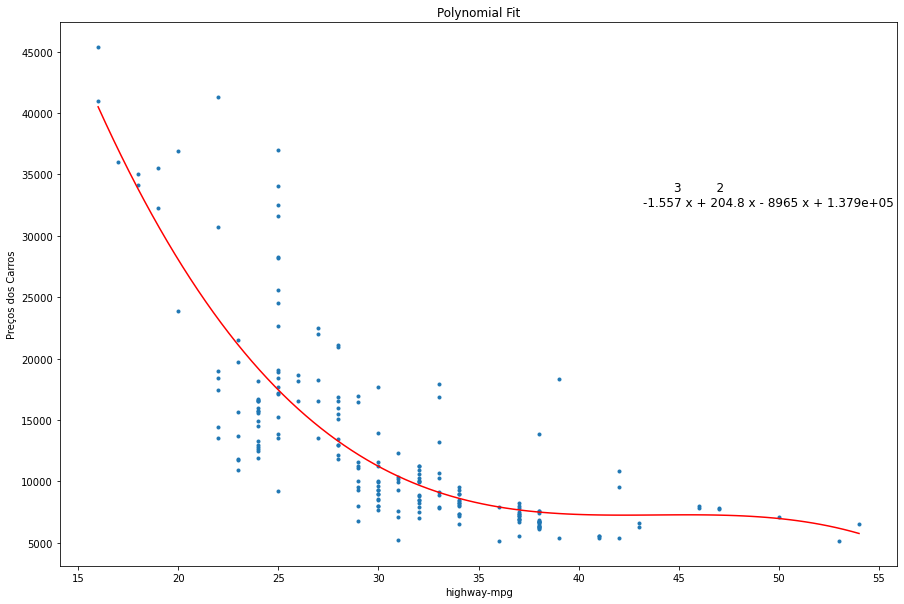

In [5]:
x = df['highway-mpg']
y = df['price']

degree = 3

# Here we use a polynomial of the 2nd order (quadratic) 
f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print("p(x) =")
print(p)
r_squared = r2_score(y, p(x))
print('\nR-quadrado: ', r_squared)

PlotPolinomio(p, x, y, 'highway-mpg')

# Modelo Polinomial Grau 7 - Uma variável independente

p(x) =
           7            6          5         4         3        2
2.302e-05 x - 0.004789 x + 0.3967 x - 16.38 x + 332.1 x - 2103 x - 2.883e+04 x + 4.15e+05

R-quadrado:  0.6822872350959341


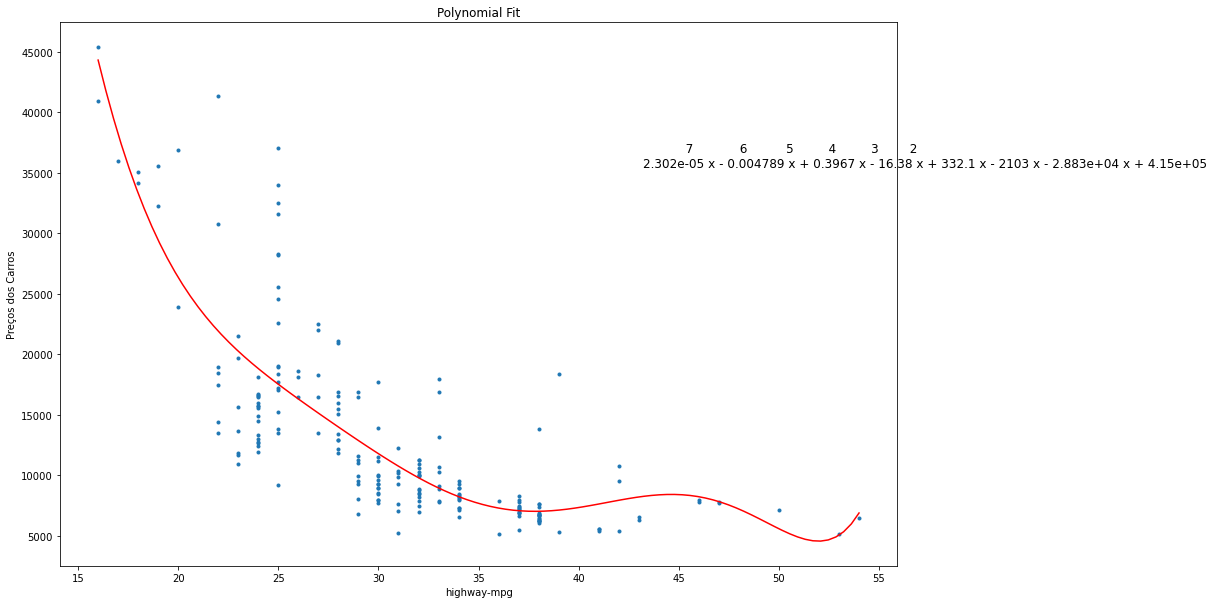

In [6]:
x = df['highway-mpg']
y = df['price']

degree = 7

# Here we use a polynomial of the 2nd order (quadratic) 
f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print("p(x) =")
print(p)
r_squared = r2_score(y, p(x))
print('\nR-quadrado: ', r_squared)

PlotPolinomio(p, x, y, 'highway-mpg')

# Modelo Polinomial Multivariado (Duas ou mais variáveis independentes)

Os modelos Polinomiais Multivarido podem ser bem complicados, abaixo temos a equação para um modelo Polinomial Multivarido

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$



In [7]:
from sklearn.preprocessing import PolynomialFeatures

Z = df[['horsepower', 'highway-mpg']]

pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

# transformar em Data Frame para os plots
Z_pr = pd.DataFrame(Z_pr)

In [8]:
print("Antes:",Z.shape)
print("Depois:",Z_pr.shape)

Antes: (201, 2)
Depois: (201, 6)


In [9]:
Z_pr.columns = ["cte", 'horsepower', 'highway-mpg', 'horsepower^2','hp*h_mpg','highway-mpg^2']
Z_pr.head()

,cte,horsepower,highway-mpg,horsepower^2,hp*h_mpg,highway-mpg^2
0,1.0,111.0,27.0,12321.0,2997.0,729.0
1,1.0,111.0,27.0,12321.0,2997.0,729.0
2,1.0,154.0,26.0,23716.0,4004.0,676.0
3,1.0,102.0,30.0,10404.0,3060.0,900.0
4,1.0,115.0,22.0,13225.0,2530.0,484.0


In [10]:
lm = LinearRegression()
lm.fit(Z_pr, df['price'])
print("SCORE: ",lm.score(Z_pr, df['price']))

Yhat=lm.predict(Z_pr)

SCORE:  0.7301213749080536


In [11]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

res = Yhat3 - Y
resAbs = abs(res)

MAD = resAbs.mean()
MSRE = math.sqrt(mean_squared_error(Y,Yhat3))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, mean_squared_error(Y,Yhat3))


sns.histplot(x=res, kde=True, stat="density", linewidth=0)
plt.title('Residuals for Price')
plt.xlabel('Price Residue (in dollars)')
plt.ylabel('Density')

plt.text(-7700, 0.0003, tt, size=15, color = "r", bbox=dict(boxstyle="round", fc="cyan", ec="b", lw=2))

NameError: name 'Yhat3' is not defined

<Figure size 1080x720 with 0 Axes>

In [ ]:
# Vamos colocar tudo num mesmo Data Frame para facilitar o Plot
df_graph = pd.DataFrame(np.array(df['price']))
df_graph.columns = ["Actual Value"]
df_graph["Fitted Value"]= Yhat

%matplotlib inline 
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_graph)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
#plt.legend(df_graph.columns)

tt = "SCORE: %f" % lm.score(Z_pr, df['price'])

plt.text(49000, 0.000037, tt)

plt.show()
plt.close()

In [ ]:
%matplotlib inline 
plt.figure(figsize=(15, 10))

res = Yhat - df['price']
resAbs = abs(res)

MAD = resAbs.mean()
MSRE = math.sqrt(mean_squared_error(Y,Yhat))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, mean_squared_error(Y,Yhat))

sns.histplot(x=res, kde=True, stat="density", linewidth=0)
plt.text(-14000, 0.0002, tt, size=15, color = "r", bbox=dict(boxstyle="round", fc="cyan", ec="b", lw=2))

## References:

Translated and inpired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-20  | 0.9  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |

<hr>